# Get video and joints data

In [38]:
import numpy as np
files = np.load("/Users/ninawiedemann/Desktop/UNI/Praktikum/ALL/video_to_pitchtype_directly/outs/files_used_first_move.npy")
files = [elem.decode("utf-8") for elem in files]
videos_p = np.load("/Users/ninawiedemann/Desktop/UNI/Praktikum/ALL/video_to_pitchtype_directly/outs/pitcher_first_move.npy")
print("loaded pitcher", videos_p.shape)
videos_b = np.load("/Users/ninawiedemann/Desktop/UNI/Praktikum/ALL/video_to_pitchtype_directly/outs/batter_first_move.npy")
print("loaded batter", videos_b.shape)

loaded pitcher (20, 167, 110, 110)
loaded batter (20, 167, 110, 110)


In [3]:
def get_data(index, cf):
    begin_cf = cf.columns.get_loc("0")
    data_array = cf.iloc[index, begin_cf:begin_cf+167].values
    N = len(data_array)

    nr_joints = len(eval(data_array[0]))
    
    data = np.zeros((N,nr_joints,2))

    for j in range(N):
        if not pd.isnull(data_array[j]):
            data[j]=np.array(eval(data_array[j]))
        else:
            data[j] = data[j-1]
    return data

In [57]:
import cv2
import pandas as pd
cf = pd.read_csv("/Users/ninawiedemann/Desktop/UNI/Praktikum/ALL/cf_data.csv")
cf_pitcher = cf[cf["Player"]=="Pitcher"]
cf_batter = cf[cf["Player"]=="Batter"]
games = cf_pitcher["Game"].values.tolist()
positions = cf_pitcher["Pitching Position (P)"].values
pitchtypes = cf_pitcher["Pitch Type"].values
games_batter = cf_batter["Game"].values.tolist()
# labels = cf["first_movement_frame_index"].values
joints_array = []
joints_array_batter = []
pos = []
pitch_type = []
for i, filename in enumerate(files):
    game = filename
    ind = games.index(game)
    pos.append(positions[ind])
    pitch_type.append(pitchtypes[ind])
    ind_batter = games_batter.index(game)
    joints_array.append(get_data(ind, cf_pitcher))
    joints_array_batter.append(get_data(ind_batter, cf_batter))
joints_array = np.array(joints_array)
joints_array_batter = np.array(joints_array_batter)

print(joints_array.shape, joints_array_batter.shape)
print(pitch_type, pos)

/Users/ninawiedemann/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (253,254,255,256,257,258,259,289) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(20, 167, 18, 2) (20, 167, 18, 2)
['Knuckleball', 'Curveball', 'Slider', 'Knuckleball', 'Knuckleball', 'Slider', 'Fastball (4-seam)', 'Slider', 'Fastball (4-seam)', 'Fastball (2-seam)', 'Knuckleball', 'Fastball (2-seam)', 'Curveball', 'Knuckleball', 'Knuckleball', 'Knuckleball', 'Fastball (4-seam)', 'Fastball (2-seam)', 'Fastball (4-seam)', 'Fastball (2-seam)'] ['Stretch', 'Windup', 'Stretch', 'Stretch', 'Windup', 'Windup', 'Stretch', 'Windup', 'Windup', 'Stretch', 'Windup', 'Windup', 'Windup', 'Windup', 'Windup', 'Windup', 'Windup', 'Stretch', 'Windup', 'Windup']


# Pitcher analysis

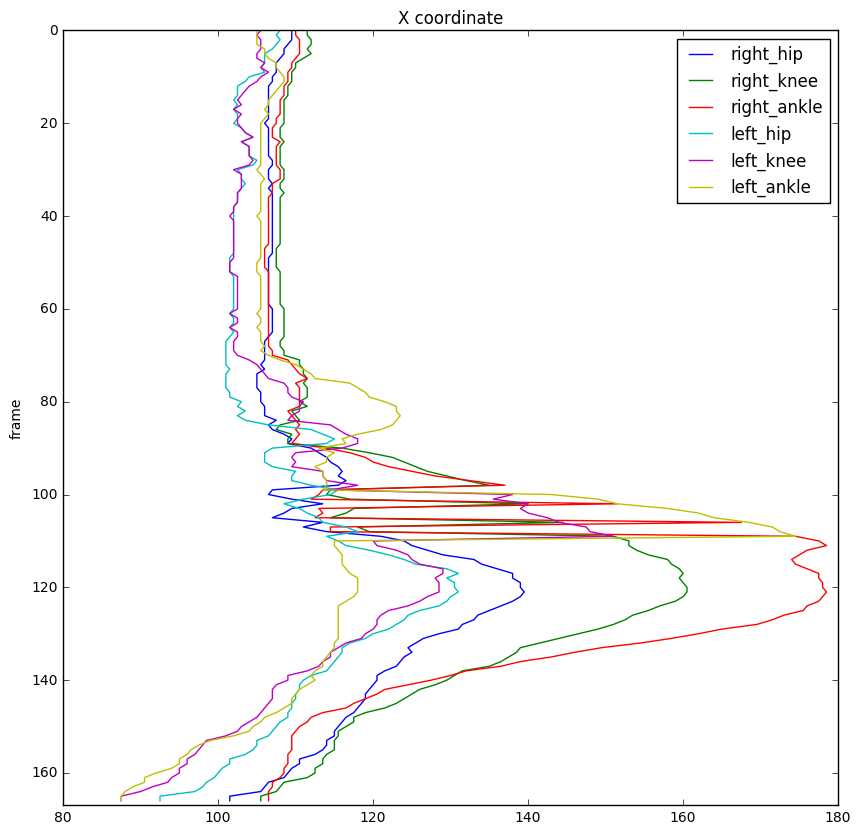

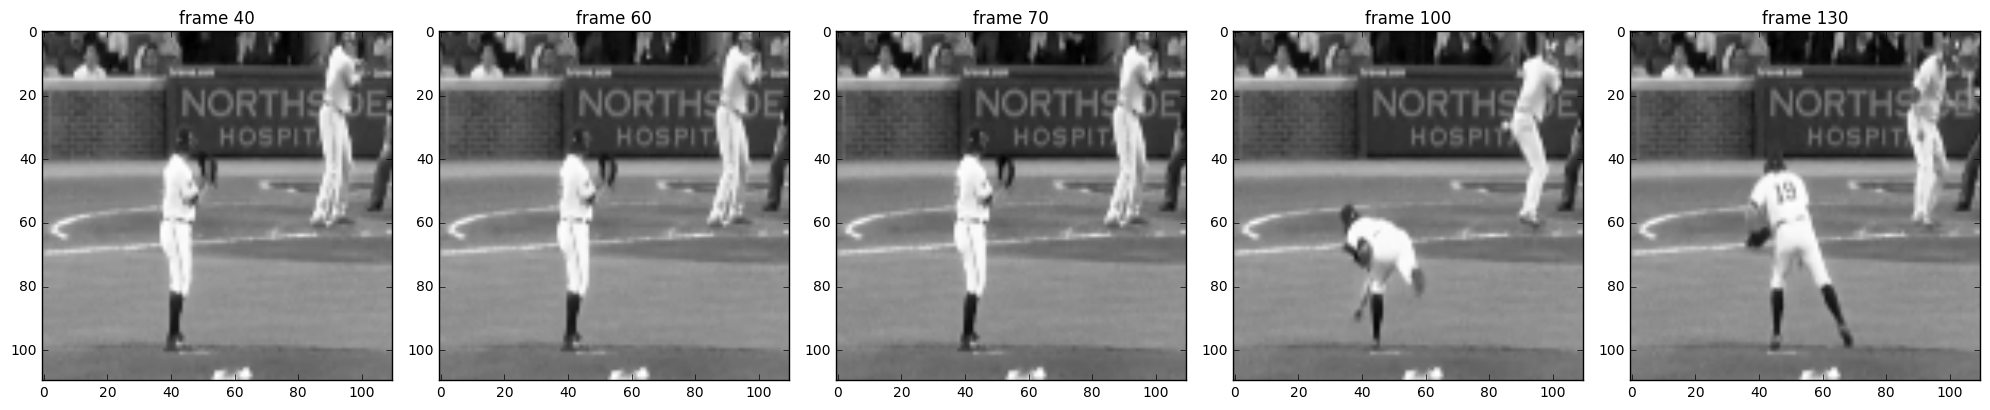

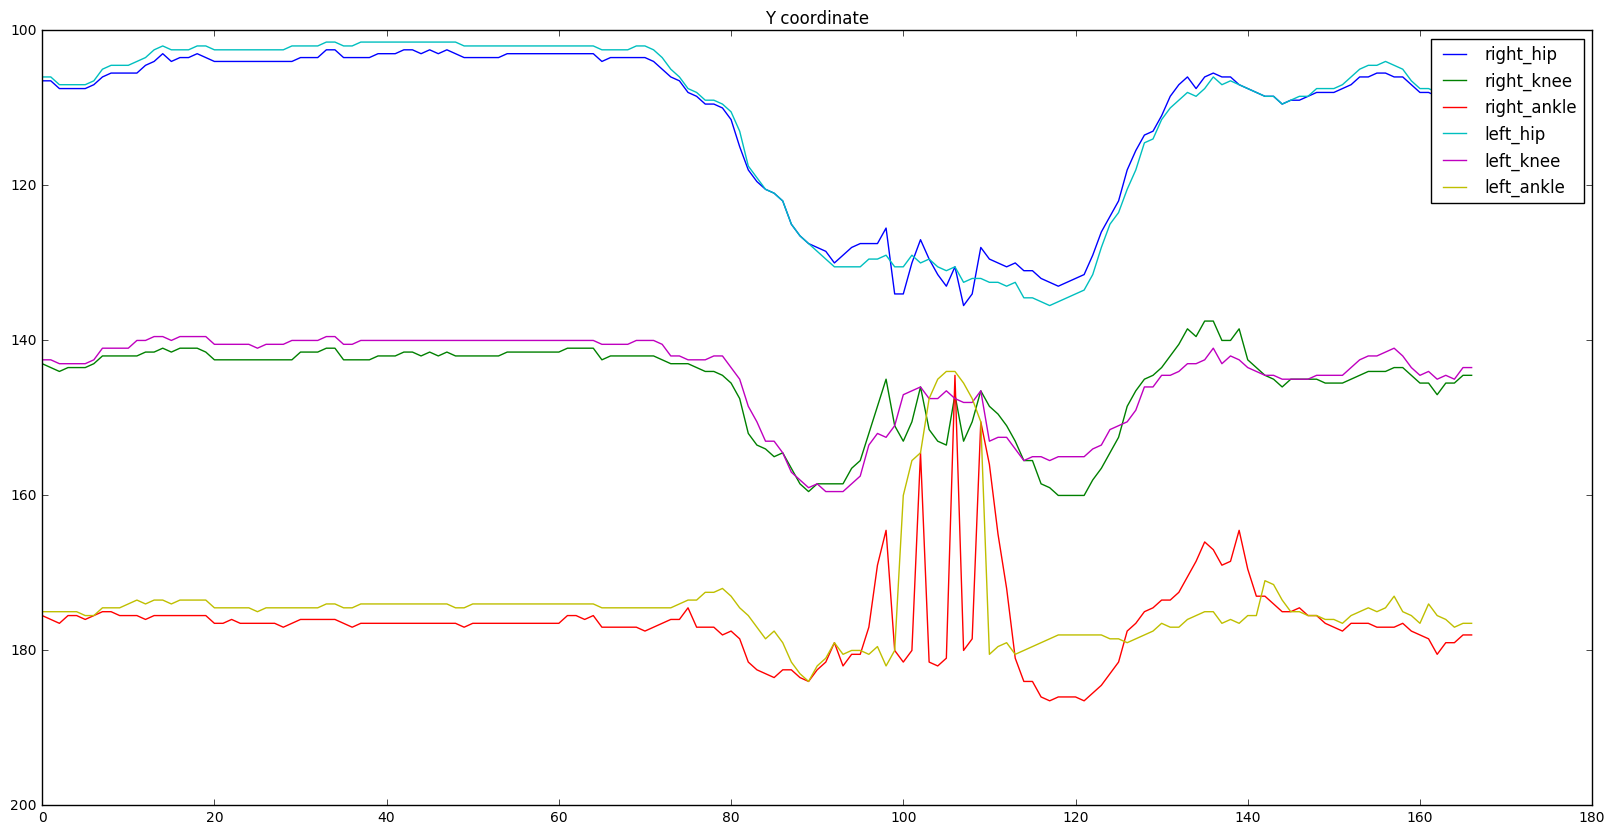

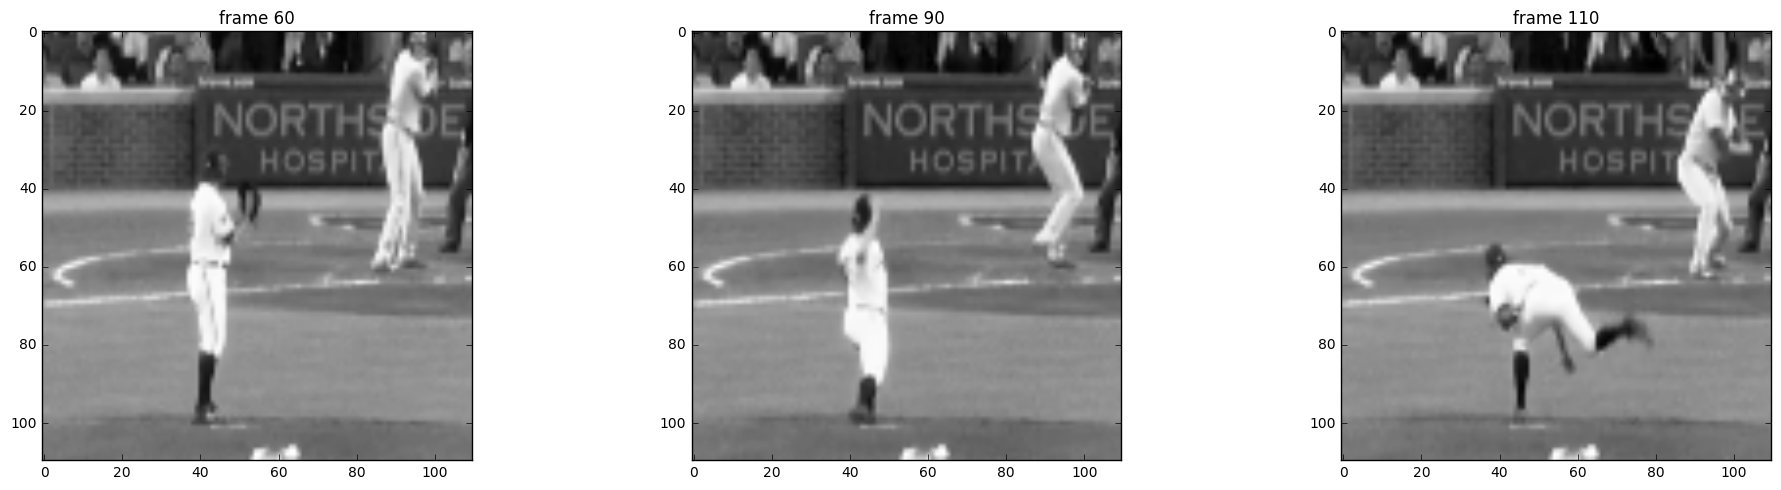

In [40]:
import matplotlib.pylab as plt

joints_list = ["right_shoulder", "left_shoulder", "right_elbow", "right_wrist","left_elbow", "left_wrist",
        "right_hip", "right_knee", "right_ankle", "left_hip", "left_knee", "left_ankle", "neck ",
        "right_eye", "right_ear","left_eye", "left_ear"]
# print(files)
one_joint = "left_knee"
video_choice = 0

plt.figure(figsize = (10,10))
for j in joints_list[6:12]:
    plt.plot(joints_array[video_choice,:,joints_list.index(j), 1], np.arange(0,167,1), label = j)
plt.title("X coordinate")
plt.ylim(167,0)
plt.ylabel("frame")
plt.legend()
plt.show()

# Plot video frames to visualize maxima in X coordinates
show_frames = [40, 60, 70, 100, 130]
fig = plt.figure(figsize=(20, 5))
for ind, i in enumerate(show_frames):
    ax = fig.add_subplot(1,len(show_frames),ind+1)
    plt.imshow(videos_p[video_choice,i])
    plt.title("frame "+str(i))
    plt.gray()
plt.tight_layout()
plt.show()


plt.figure(figsize = (20,10))
for j in joints_list[6:12]: #[one_joint]: 
    plt.plot(joints_array[video_choice,:,joints_list.index(j), 0], label = j)
plt.legend()
plt.ylim(200, 100)
plt.title("Y coordinate")
plt.show()

# Plot video frames to visualize maxima in Y coordinates
show_frames = [60, 90, 110]
fig = plt.figure(figsize=(20, 5))
for ind, i in enumerate(show_frames):
    ax = fig.add_subplot(1,len(show_frames),ind+1)
    plt.imshow(videos_p[video_choice,i])
    plt.title("frame "+str(i))
plt.tight_layout()
plt.show()

In [49]:
print(files[3])
print(np.array(pos).shape, pos)

491001-6856e2dc-626d-4d9a-9494-e565192d27b7
(20,) ['Stretch', 'Windup', 'Stretch', 'Stretch', 'Windup', 'Windup', 'Stretch', 'Windup', 'Windup', 'Stretch', 'Windup', 'Windup', 'Windup', 'Windup', 'Windup', 'Windup', 'Windup', 'Stretch', 'Windup', 'Windup']


[  0  77  78  79  80  81  82  83  86  87  89  90  92  94  95  96  97  98
  99 104 105 107]
[ 77  78  79  80  81  82  83  86  87  89  90  92  94  95  96  97  98  99
 104 105 107]


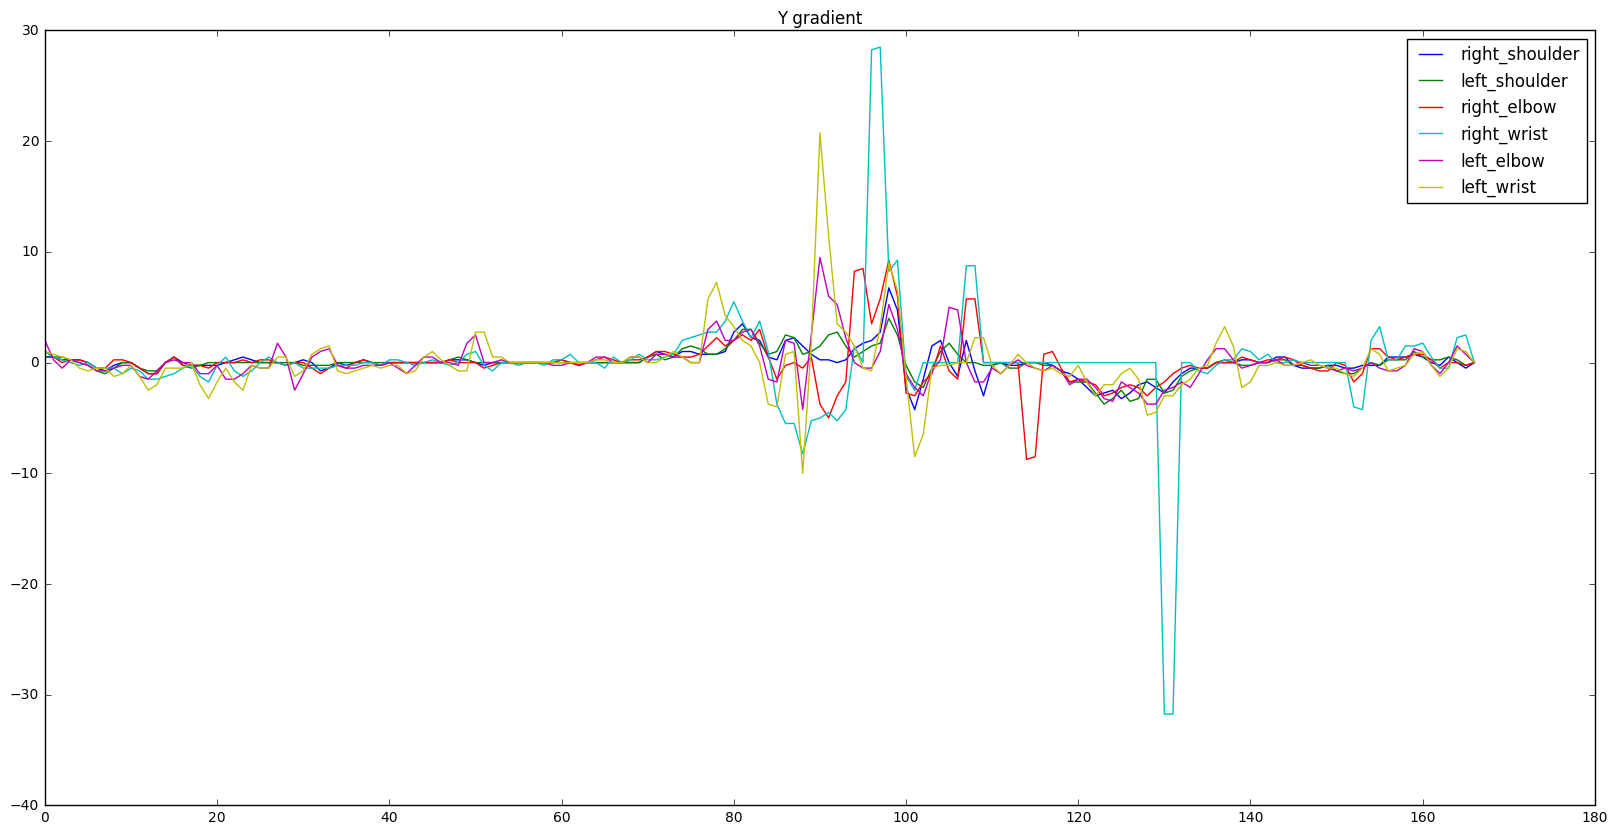

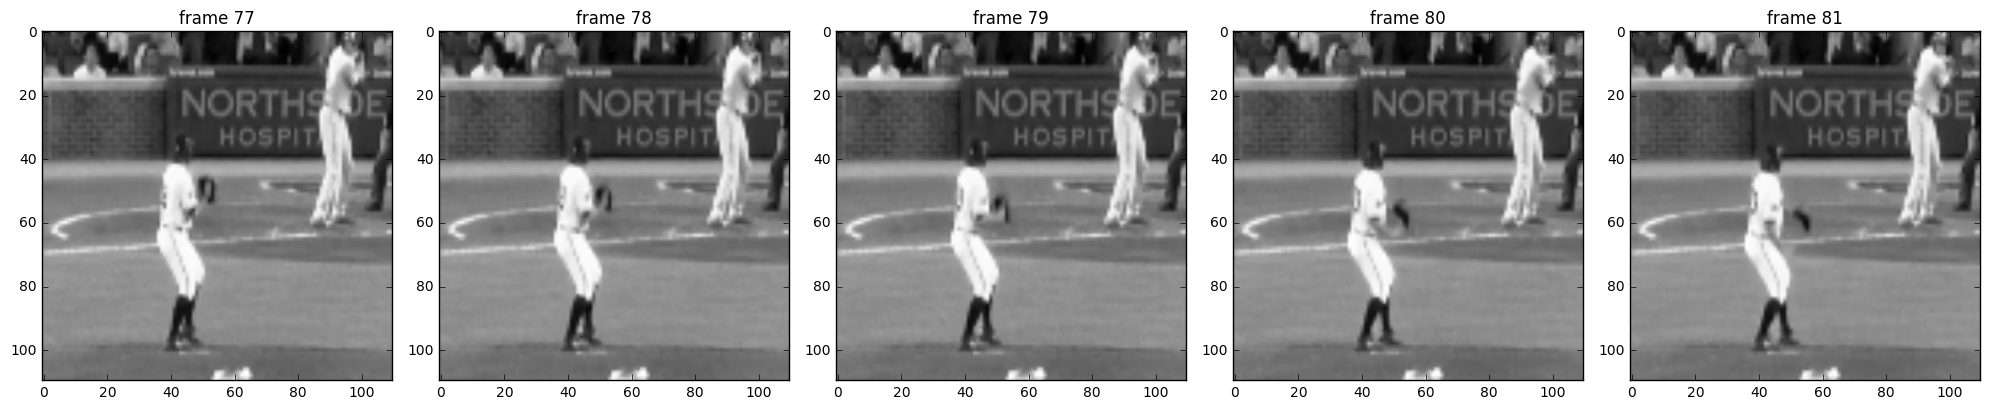

[ 72  73  75  76  77  78  80  81  82  90  91  92  93  94  95  96  97  98
 123]


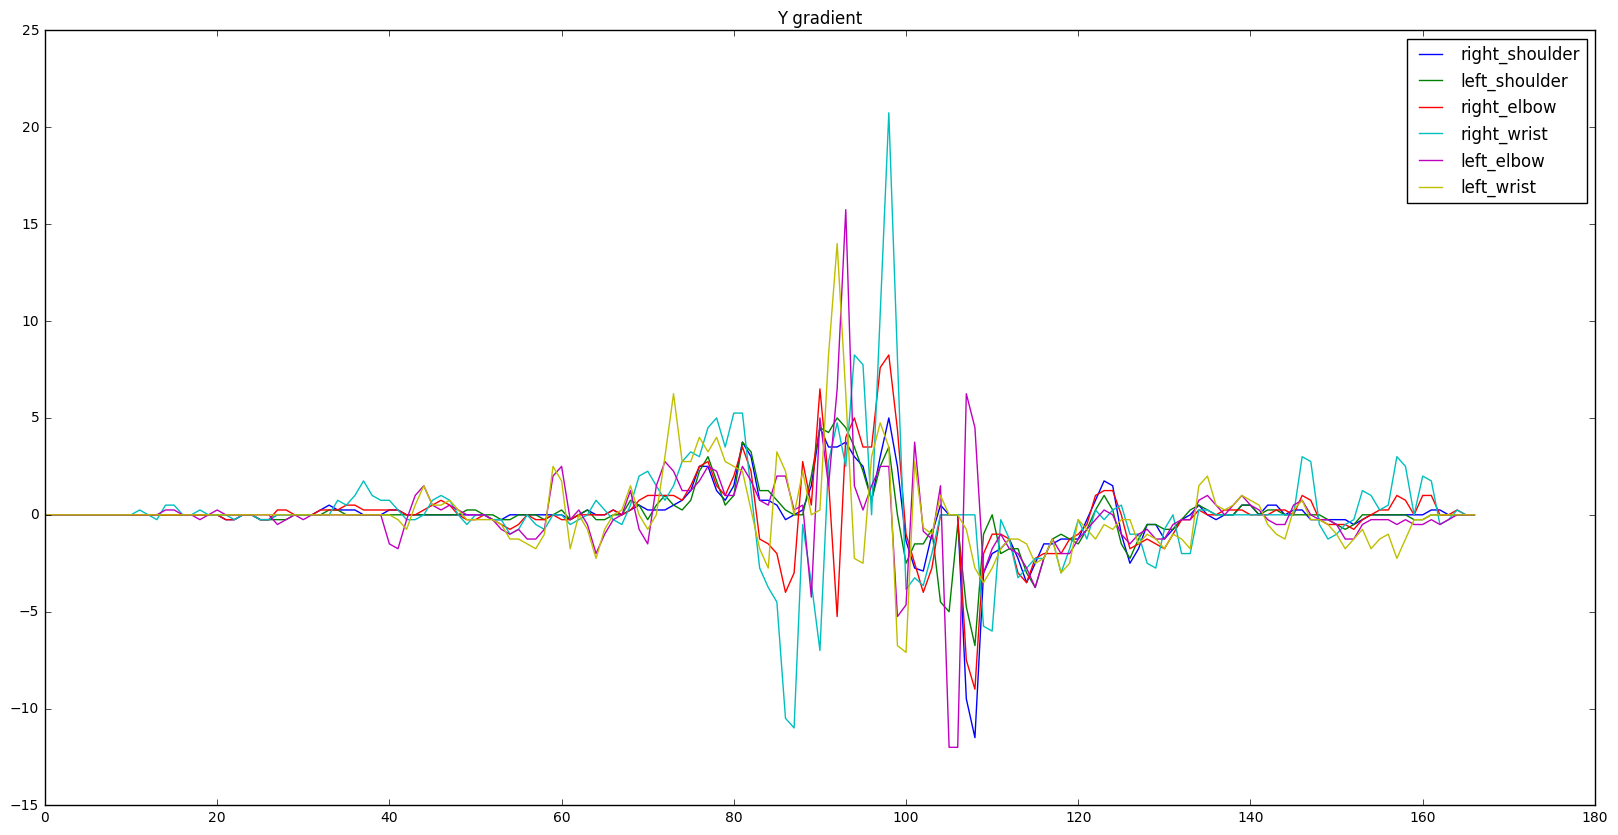

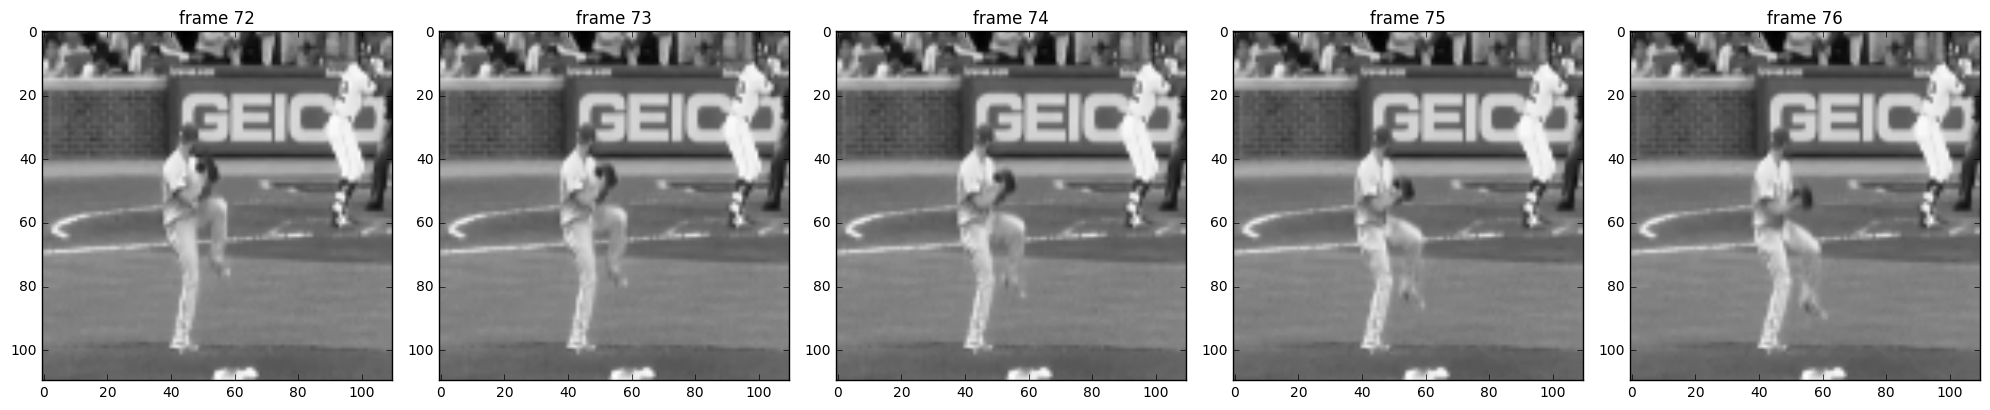

[73 74 75 76 77 78 79 80 81 82 83 90 93 94]


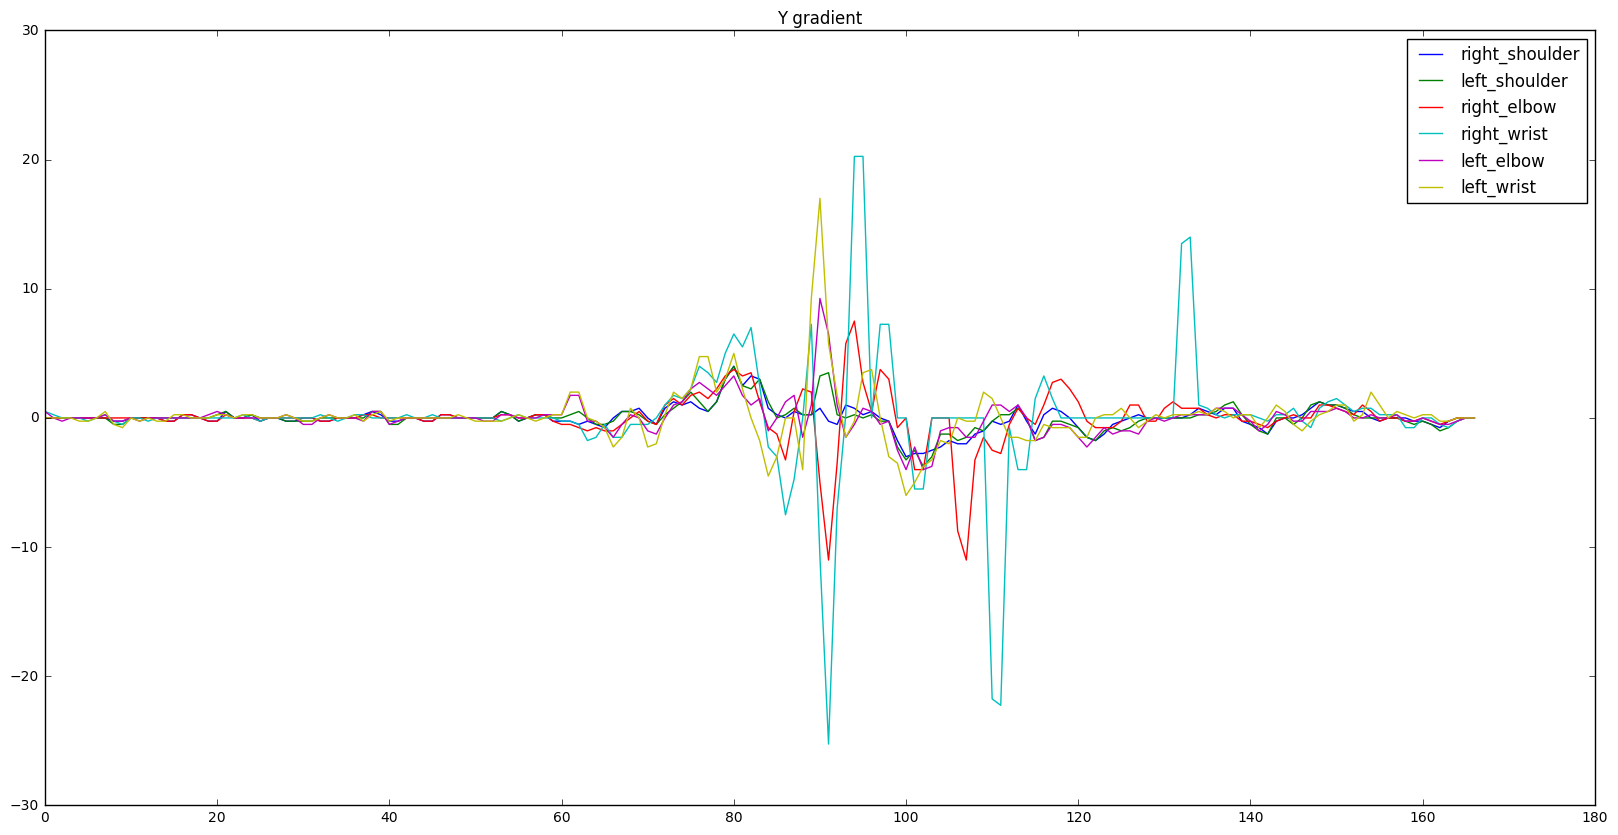

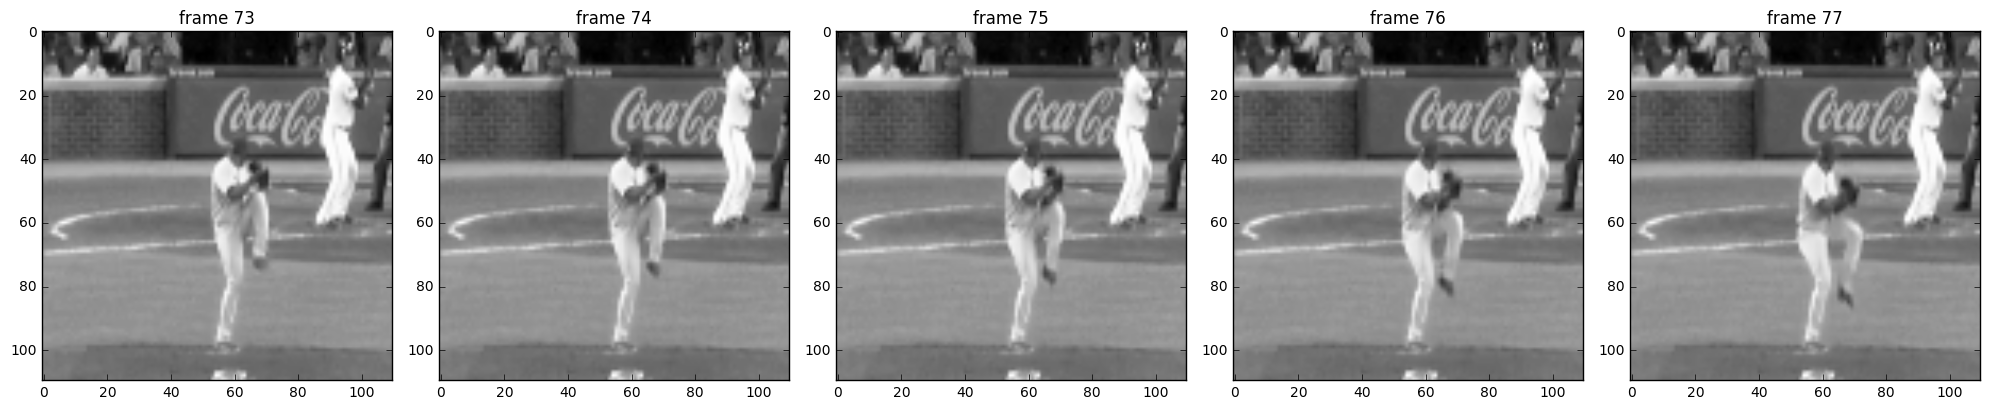

[ 73  74  75  76  77  78  79  80  81  82  85  86  87  90  93  94  95  96
  97  98 100 158 159 161]


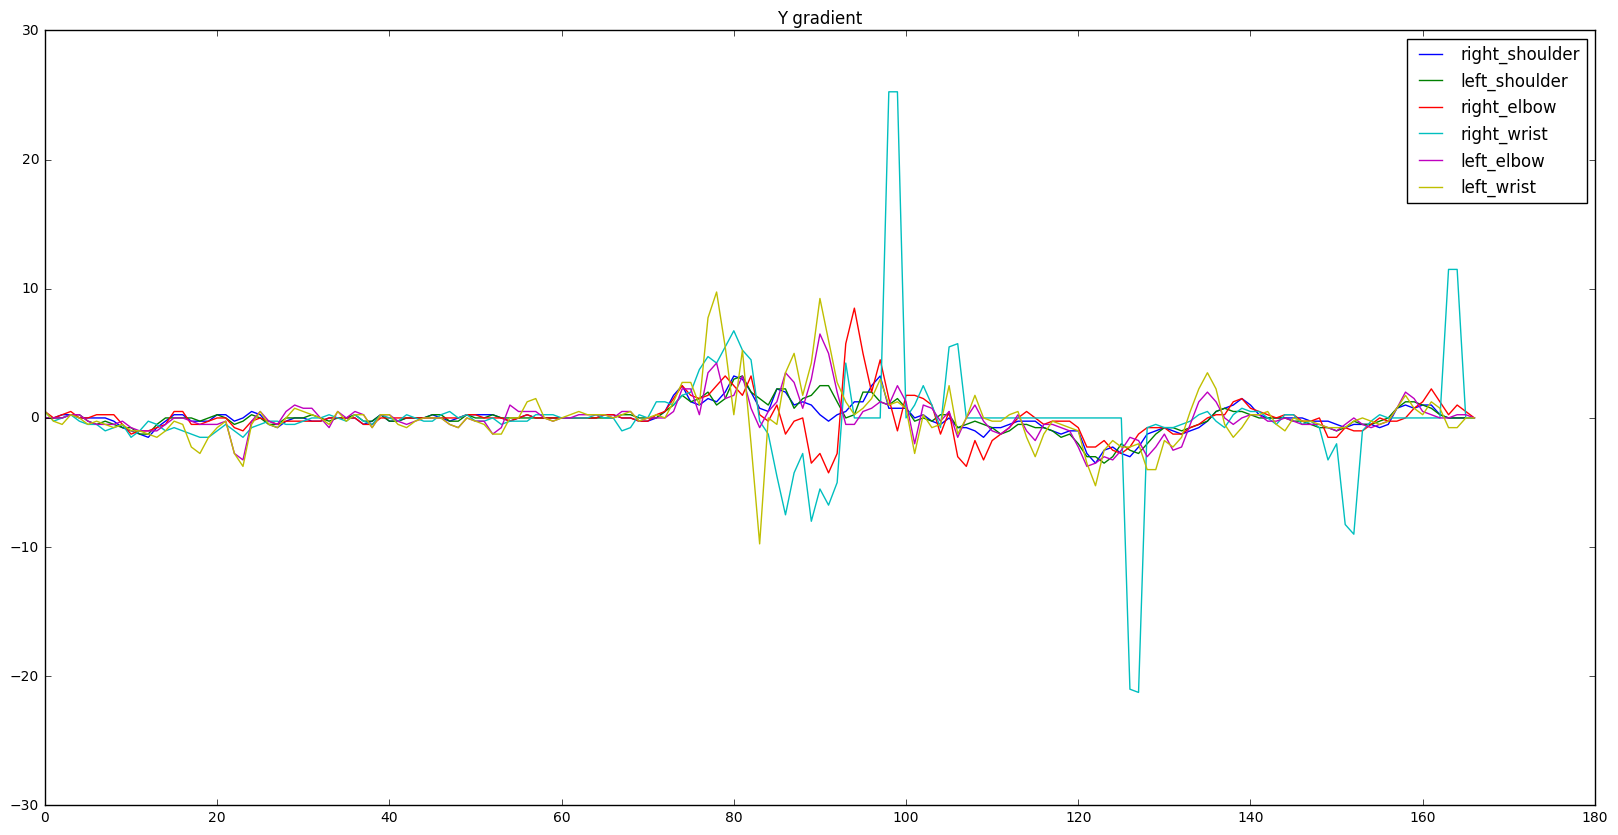

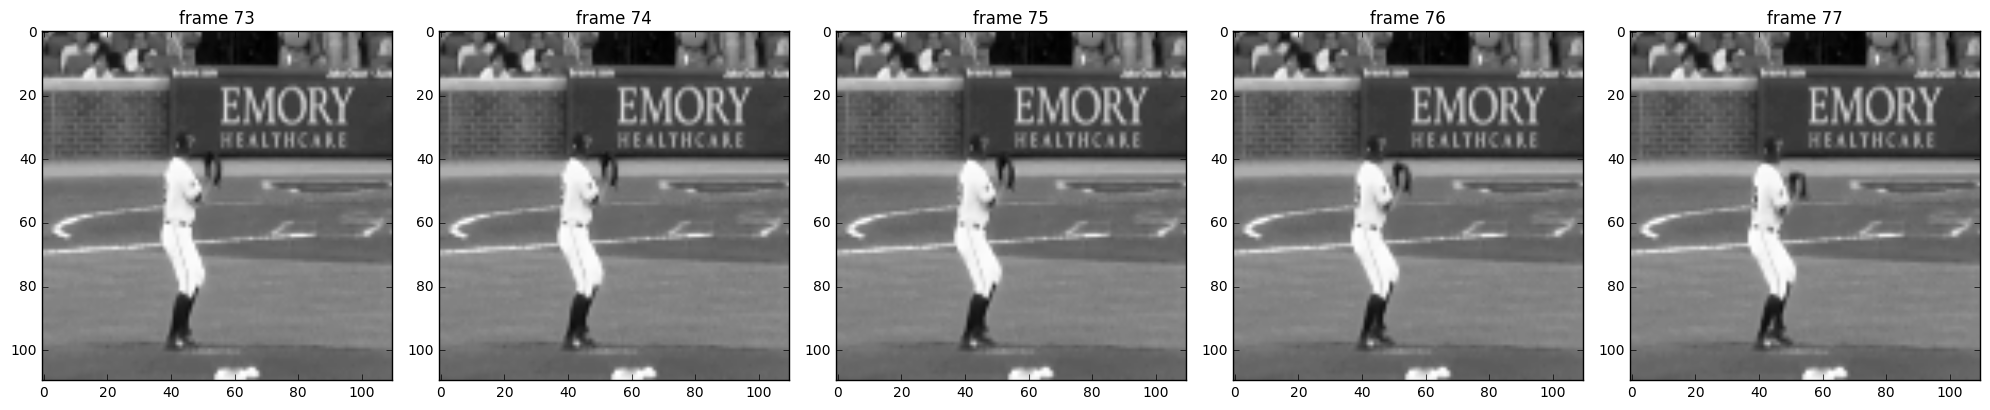

[ 69  75  76  77  78  79  80  81  82  83  85  86  87  89  90  94  95  96
  97  98  99 103]
[ 75  76  77  78  79  80  81  82  83  85  86  87  89  90  94  95  96  97
  98  99 103]


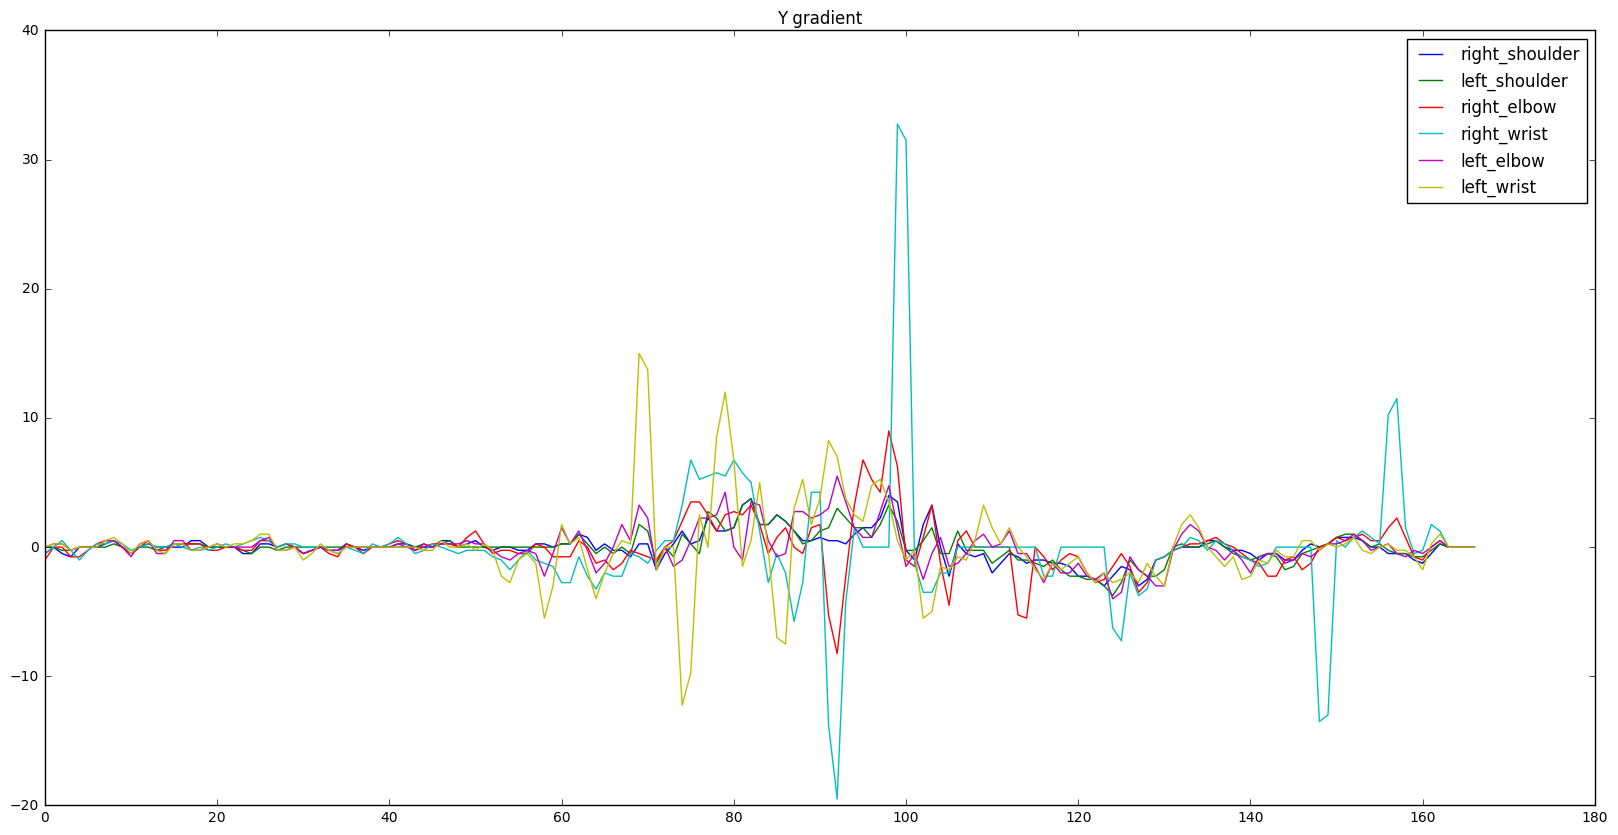

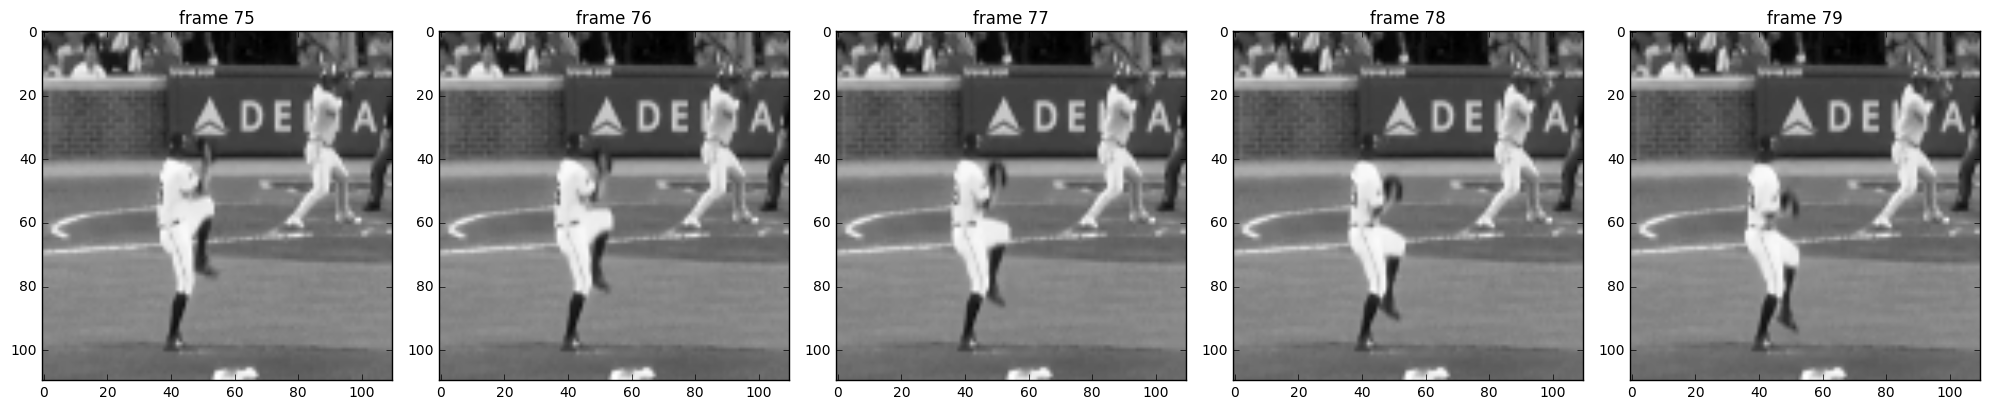

In [46]:
#print(joints_array[video_choice,:,joints_list.index(j), 0])

#test_set = joints_array[19,15:23, 7:12, 0]
#print(test_set)

# video_choice = 15
for video_choice in range(5):     #change
    gradients = np.array([np.gradient(joints_array[video_choice,:,joints_list.index(j), 0], edge_order = 2) 
                          for j in ["right_shoulder", "left_shoulder", "right_elbow","left_elbow"]]) #["right_knee", "right_ankle", "left_knee", "left_ankle"]])
    mean_gradient = np.mean(gradients, axis=0)
    #print(mean_gradient)
    move = np.where(mean_gradient>1)[0]  #change
    print(move)
    while move[0]!=move[1]-1:
        move = np.delete(move, 0)
        print(move)

    plt.figure(figsize = (20,10))
    for j in joints_list[:6]: #[one_joint]:     #change
        plt.plot(np.gradient(joints_array[video_choice,:,joints_list.index(j), 0]), label = j)
    plt.legend()
    #plt.ylim(200, 100)
    plt.title("Y gradient")
    plt.show()

    fig = plt.figure(figsize=(20, 5))
    show_frames = range(move[0], move[0]+5) #[17, 18, 19, 20, 21]
    for ind, i in enumerate(show_frames):
        ax = fig.add_subplot(1,len(show_frames),ind+1)
        plt.imshow(videos_p[video_choice,i])
        plt.gray()
        plt.title("frame "+str(i))
    plt.tight_layout()
    plt.show()

# Batter analysis

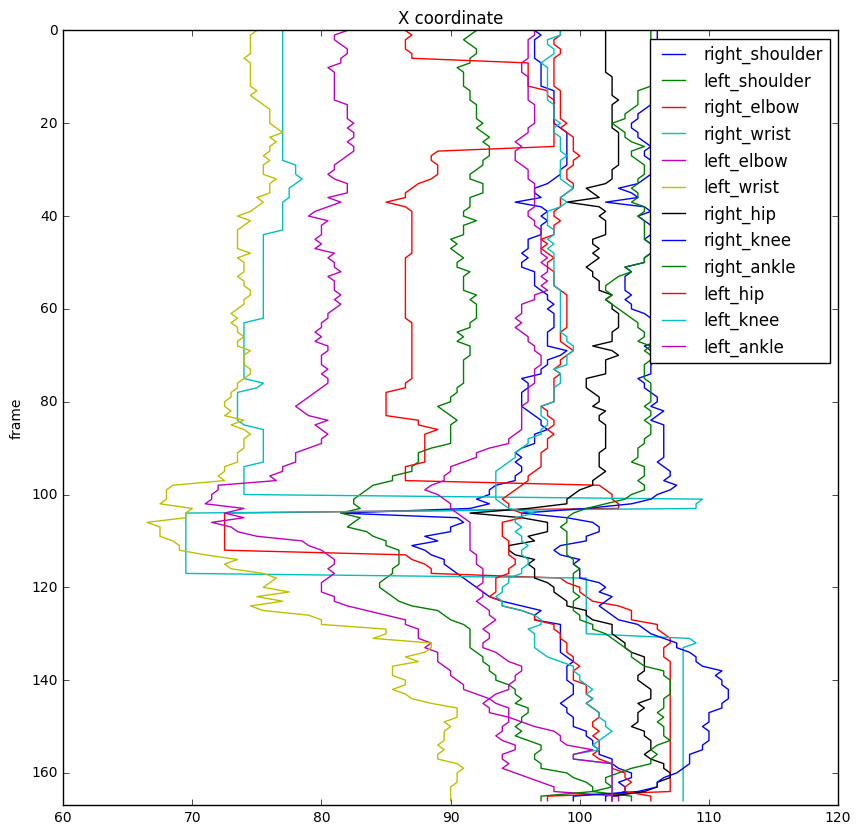

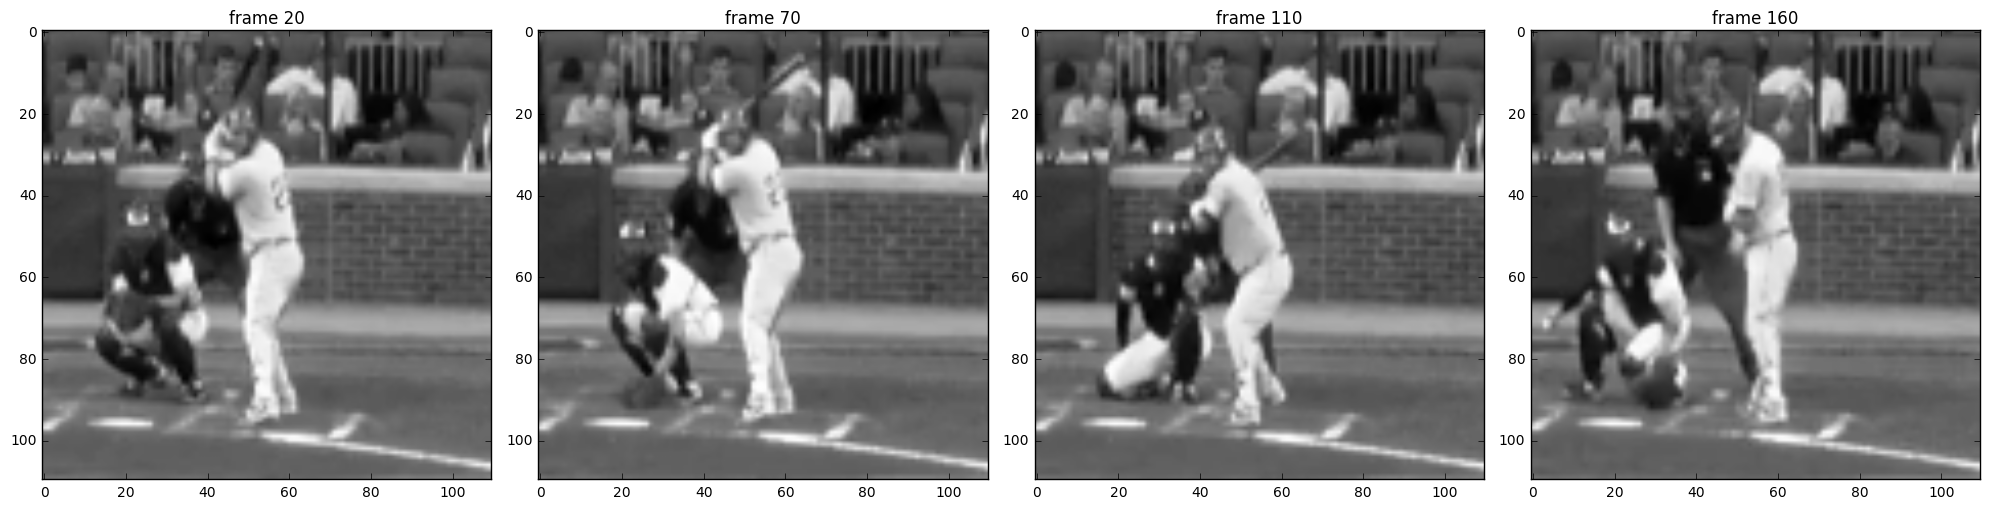

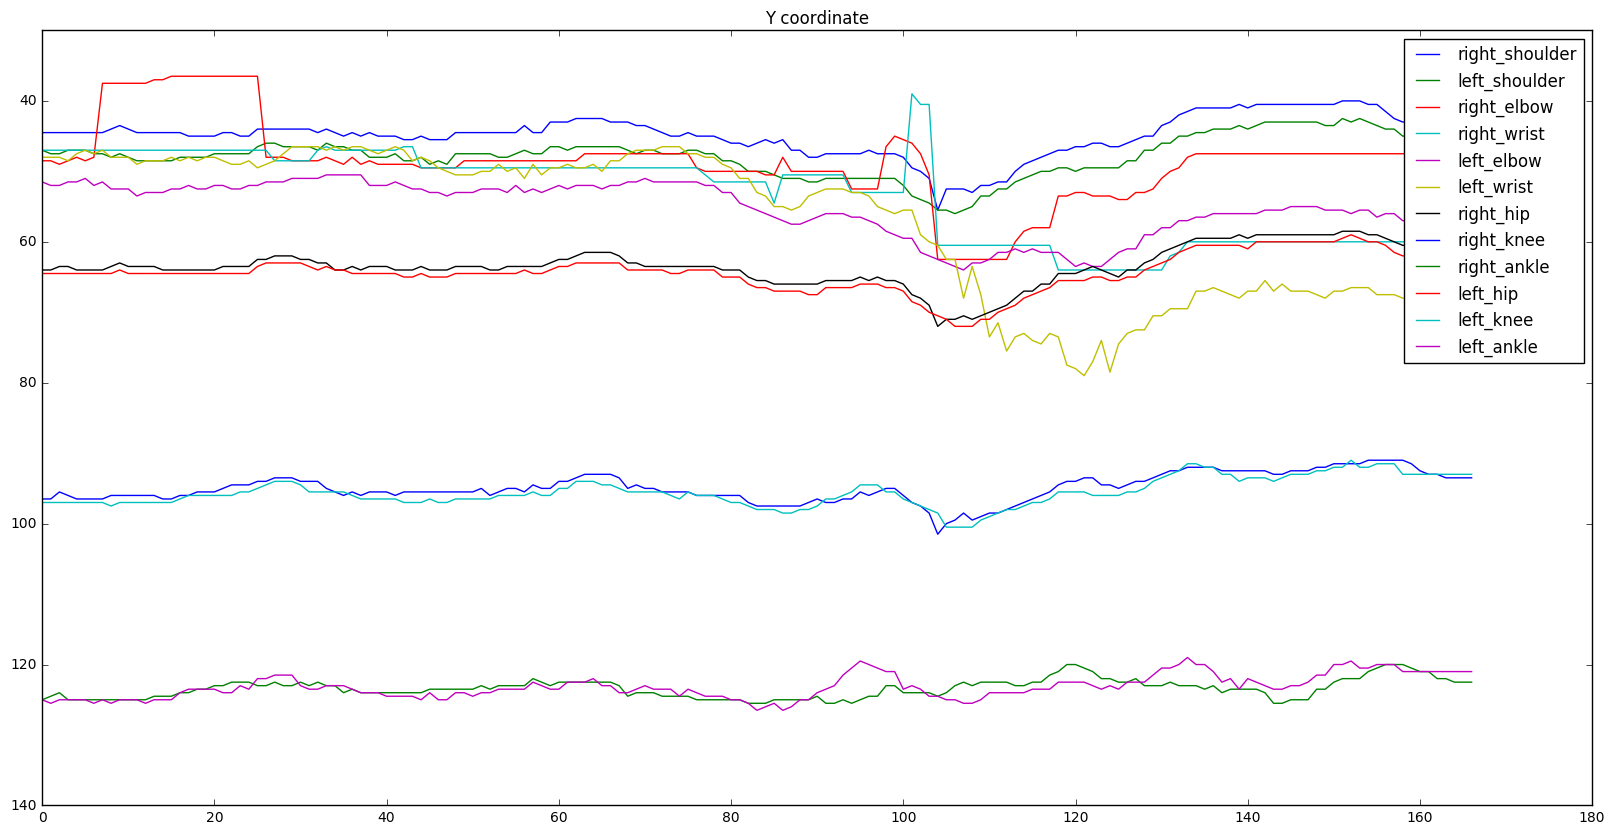

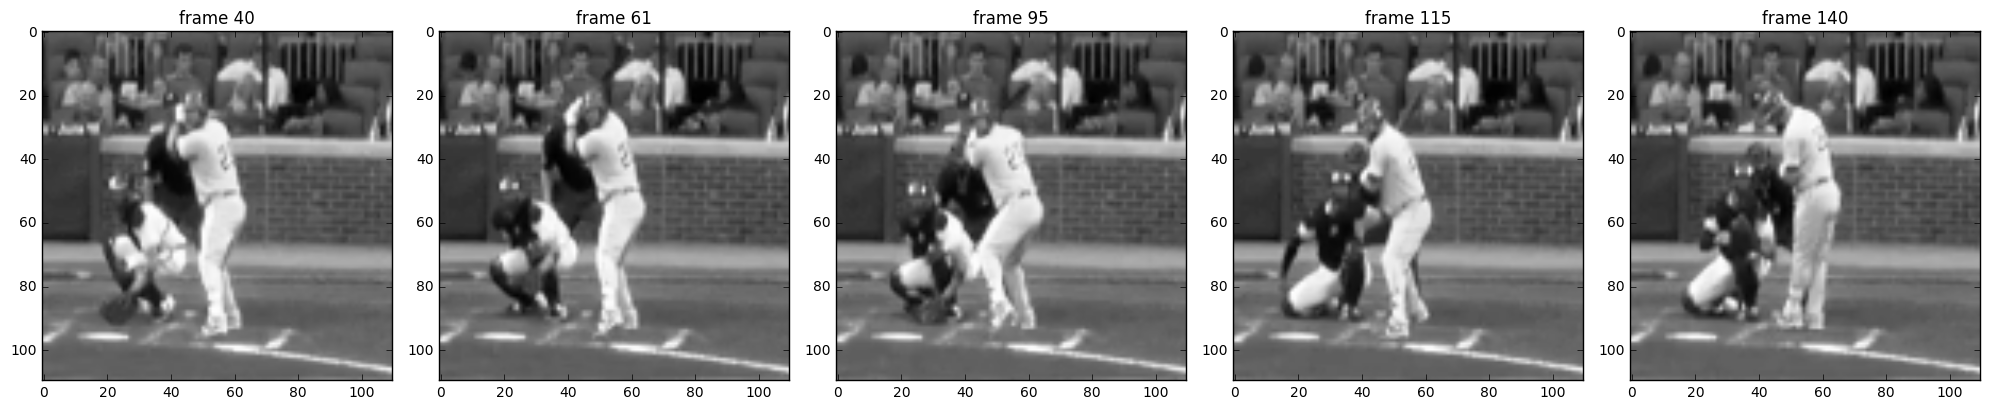

In [55]:
import matplotlib.pylab as plt

joints_list = ["right_shoulder", "left_shoulder", "right_elbow", "right_wrist","left_elbow", "left_wrist",
        "right_hip", "right_knee", "right_ankle", "left_hip", "left_knee", "left_ankle", "neck ",
        "right_eye", "right_ear","left_eye", "left_ear"]
# print(files)
one_joint = "left_knee"
video_choice = 3

plt.figure(figsize = (10,10))
for j in joints_list[:12]:
    plt.plot(joints_array_batter[video_choice,:,joints_list.index(j), 1], np.arange(0,167,1), label = j)
plt.title("X coordinate")
plt.ylim(167,0)
plt.ylabel("frame")
plt.legend()
plt.show()

# Plot video frames to visualize maxima in X coordinates
show_frames = [20, 70, 110, 160]
fig = plt.figure(figsize=(20, 5))
for ind, i in enumerate(show_frames):
    ax = fig.add_subplot(1,len(show_frames),ind+1)
    plt.imshow(videos_b[video_choice,i])
    plt.title("frame "+str(i))
    plt.gray()
plt.tight_layout()
plt.show()


plt.figure(figsize = (20,10))
for j in joints_list[:12]: #[one_joint]: 
    plt.plot(joints_array_batter[video_choice,:,joints_list.index(j), 0], label = j)
plt.legend()
plt.ylim(140, 30)
plt.title("Y coordinate")
plt.show()

# Plot video frames to visualize maxima in Y coordinates
show_frames = [40, 61, 95, 115, 140]
fig = plt.figure(figsize=(20, 5))
for ind, i in enumerate(show_frames):
    ax = fig.add_subplot(1,len(show_frames),ind+1)
    plt.imshow(videos_b[video_choice,i])
    plt.title("frame "+str(i))
plt.tight_layout()
plt.show()

# Difference image approach

---------------------------NEW VIDEO-----------------------------
60


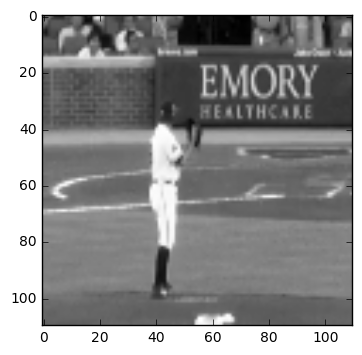

61


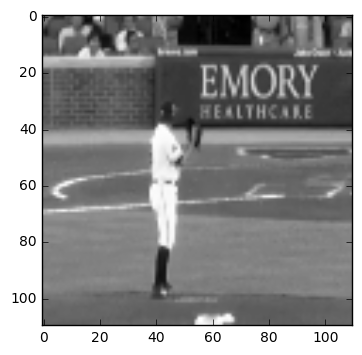

62


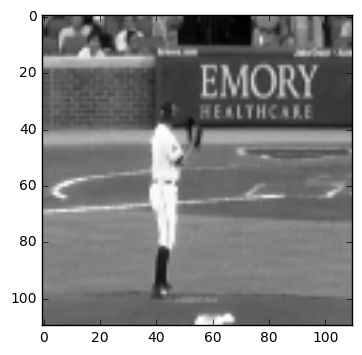

63


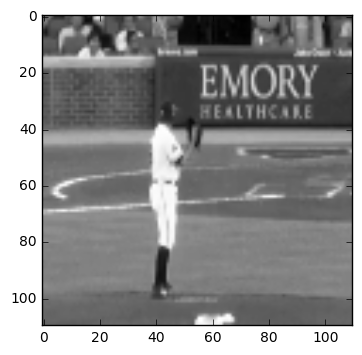

64


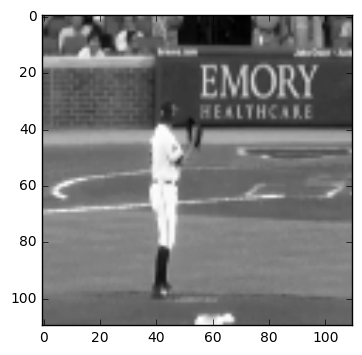

65


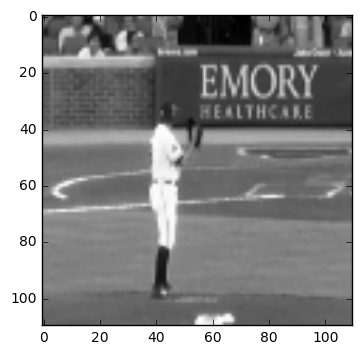

66


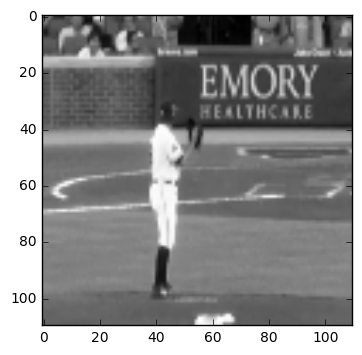

67


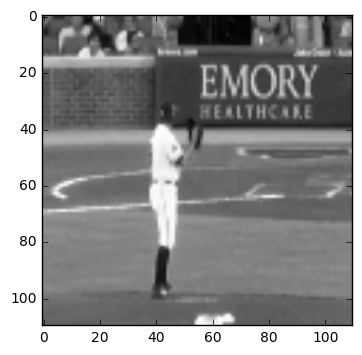

68


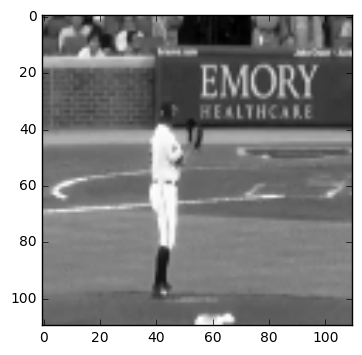

69


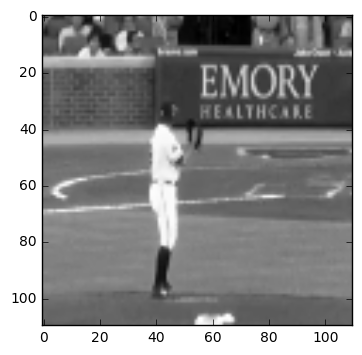

70


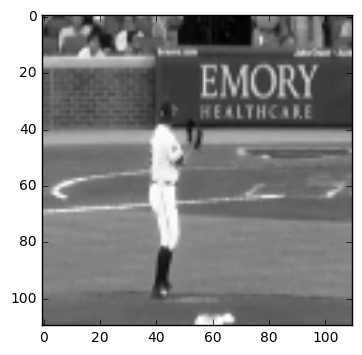

71


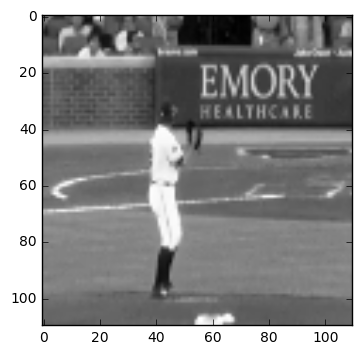

72


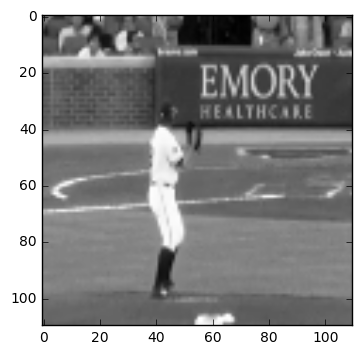

73


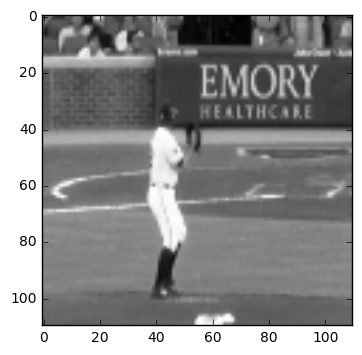

74


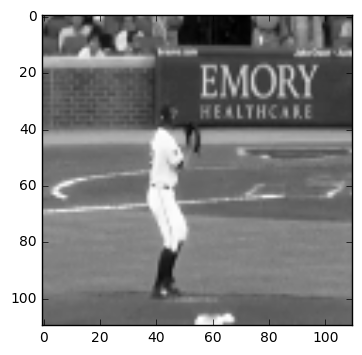

75


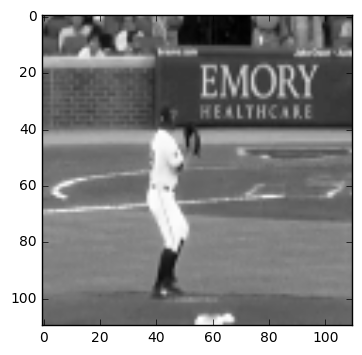

76


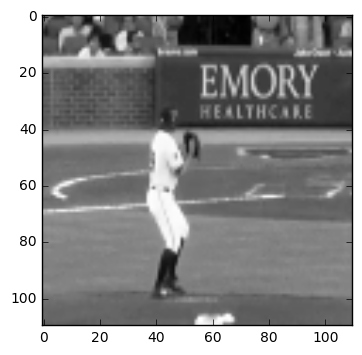

77


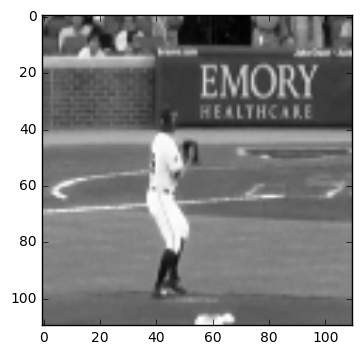

78


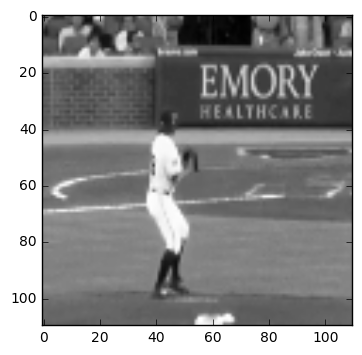

79


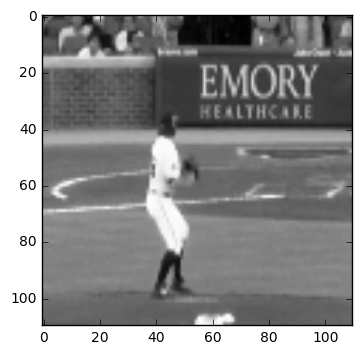

80


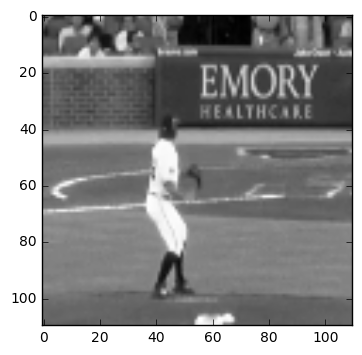

81


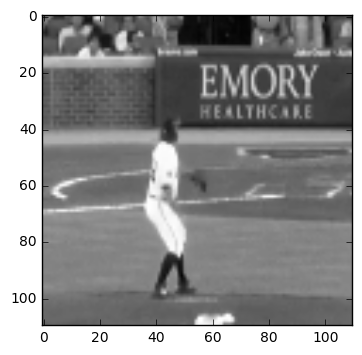

82


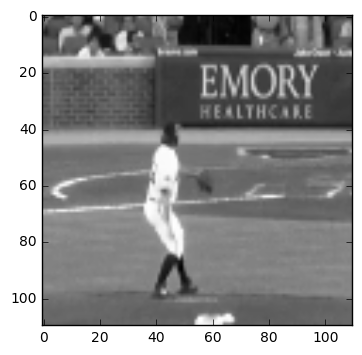

83


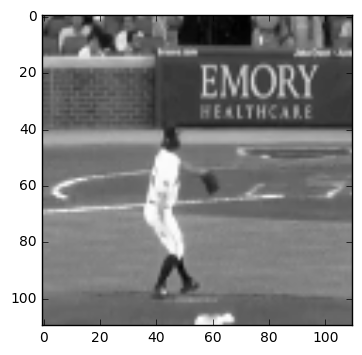

84


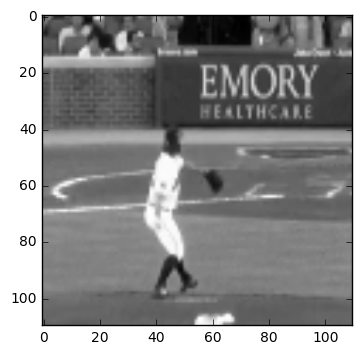

85


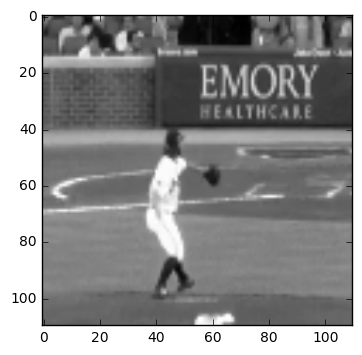

86


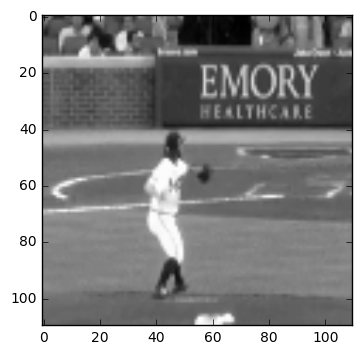

87


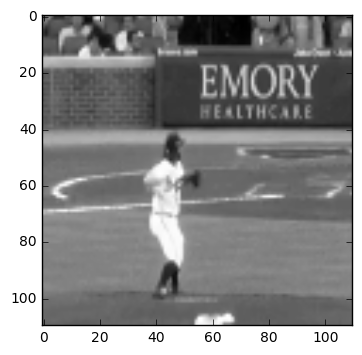

88


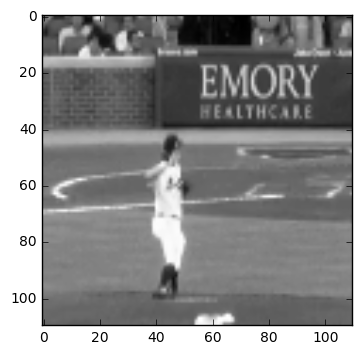

89


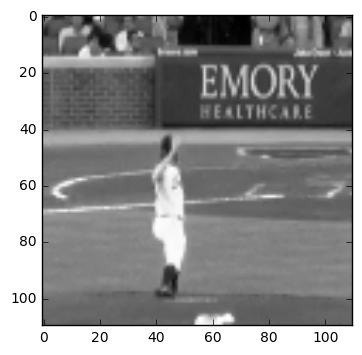

90


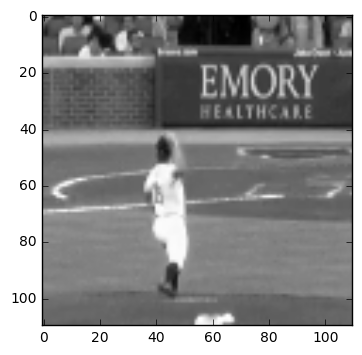

91


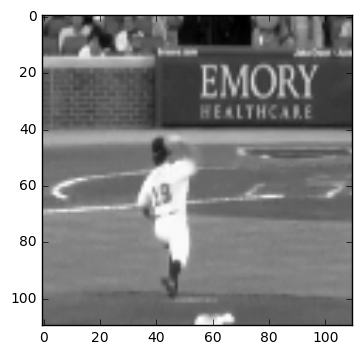

92


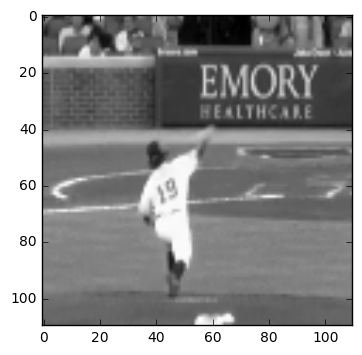

93


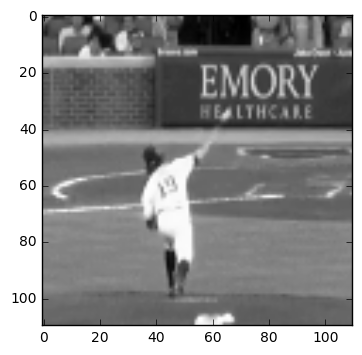

94


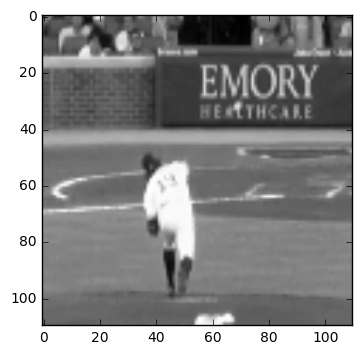

95


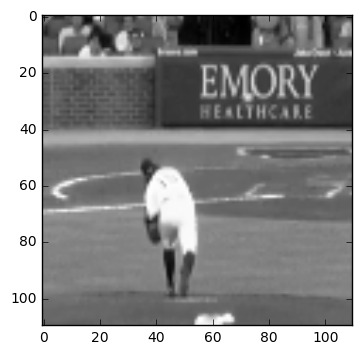

96


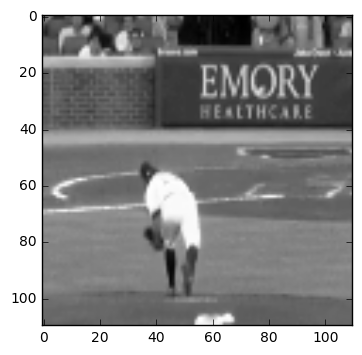

97


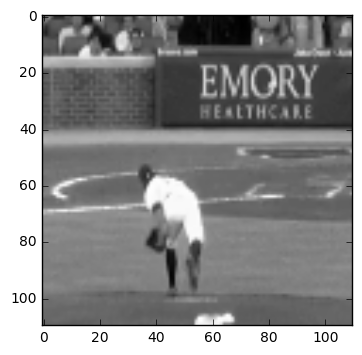

98


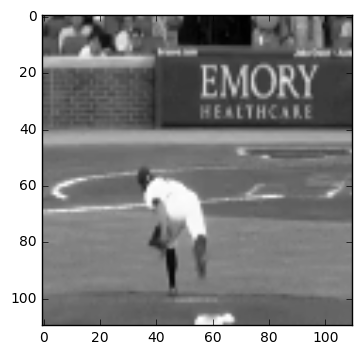

99


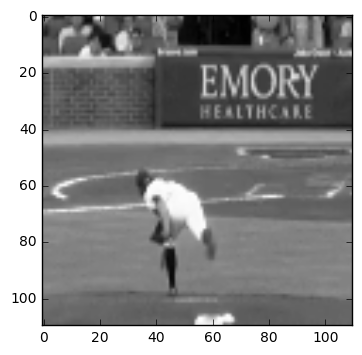

'        if i==20 and not found:\n            mean_diff = np.mean(diffs)\n            print("mean_diff:", mean_diff)\n        if i > 0:\n            #plt.imshow(np.absolute(pitcher-frames[i-1]))\n            # plt.gray()\n            #plt.colorbar()\n            #plt.show()\n            diff = np.mean(np.absolute(pitcher-frames[i-1]))\n            higher5 = np.sum(np.absolute(pitcher-frames[i-1])>0.01)\n            #print(np.sum(np.absolute(pitcher-frames[i-1])>5))\n            diffs.append(diff)\n            print(diff)\n            if i>20 and diff> 1.1*mean_diff and not found: # np.sum(higher5)>FAC2*nr_pix\n                    start_frame.append(i)\n                    found = True\n                    print("found", i) \n                    print(diff)\n                    plt.subplot(121)\n                    plt.imshow(pitcher)\n                    plt.subplot(122)\n                    plt.imshow(np.absolute(pitcher-frames[i-1]))\n                    plt.gray()\n                 

In [56]:
KERNEL_SIZE = 5
DIFF = 2
FAC2 = 1/2

start_frame = []

for frames in videos_p[3:4]: #[:, :,70:100, 30:50]:
    mean_diff = 0
    diffs = []
    print("---------------------------NEW VIDEO-----------------------------")
    nr_pix = frames.shape[1]*frames.shape[2]
    i = 0
    found = False
    #plt.figure()
    for i in range(60,100):
        print(i)
        pitcher = frames[i]
        plt.imshow(pitcher)
        plt.gray()
        plt.show()
        pitcher = cv2.GaussianBlur(pitcher,(KERNEL_SIZE,KERNEL_SIZE),0)
        i+=1
"""        if i==20 and not found:
            mean_diff = np.mean(diffs)
            print("mean_diff:", mean_diff)
        if i > 0:
            #plt.imshow(np.absolute(pitcher-frames[i-1]))
            # plt.gray()
            #plt.colorbar()
            #plt.show()
            diff = np.mean(np.absolute(pitcher-frames[i-1]))
            higher5 = np.sum(np.absolute(pitcher-frames[i-1])>0.01)
            #print(np.sum(np.absolute(pitcher-frames[i-1])>5))
            diffs.append(diff)
            print(diff)
            if i>20 and diff> 1.1*mean_diff and not found: # np.sum(higher5)>FAC2*nr_pix
                    start_frame.append(i)
                    found = True
                    print("found", i) 
                    print(diff)
                    plt.subplot(121)
                    plt.imshow(pitcher)
                    plt.subplot(122)
                    plt.imshow(np.absolute(pitcher-frames[i-1]))
                    plt.gray()
                    plt.show()
            if found:
                plt.subplot(121)
                plt.imshow(pitcher)
                plt.subplot(122)
                plt.imshow(np.absolute(pitcher-frames[i-1]))
                plt.gray()
                plt.show()
                if i>start_frame[-1]+4:
                    print(i, start_frame[-1])
                    break"""
        

In [58]:
print(cf.columns.tolist()
     )

['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '15

In [89]:
col = cf_batter['balls'].values
nonzero = np.logical_not(pd.isnull(col))
print(len(col), len(games_batter))
print(np.unique(col[nonzero]))
# TEST CURRENT FILES FOR  BATS
for i, filename in enumerate(files):
    game = filename
    ind_batter = games_batter.index(game)
    print(col[ind_batter])
#print(col[np.logical_not(])
for i in range(len(col)):
    if not pd.isnull(col[i]):
        print(games_batter[i], col[i])

6575 6575
[ 0.  1.  2.  3.]
0.0
1.0
0.0
0.0
1.0
0.0
2.0
0.0
2.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
2.0
3.0
0.0
1.0
490987-49b51b3c-5260-4d06-b44d-0553adea105d 0.0
490987-95bdbdc2-454f-4dcb-a21c-afc087d35e27 0.0
490987-2b8452c8-c23e-4e1f-9f5e-475d7b9d5bb9 1.0
490987-c0063b86-7a43-4b8c-a603-c7d3fb52b02a 2.0
490987-b73fc5e5-e342-4472-b1cc-7f00a3b42426 0.0
490987-f7247454-4c66-402e-9edb-f13d8630aa52 1.0
490987-01c04433-b8f6-4a3e-b27d-d934b1b922a1 0.0
490987-3ed9d980-9478-4295-9342-065b0d2db7c6 0.0
490987-a30aedaa-0fb5-4ea1-a815-8d524caae21a 1.0
490987-d41c65ef-41ad-4288-8aca-b13e0f3db6f2 0.0
490987-99559765-f81e-4bdd-83b3-9e4f9a228d8a 0.0
490987-836e4799-78f1-4ff3-8618-ffc5daf4d542 1.0
490987-e166e54d-e6dd-493e-8f68-469a4d701999 0.0
490987-f6f14813-28b2-4ae2-a5bc-fb242c681da9 1.0
490987-34f6ed15-64a8-4dc9-a499-612bd9dfdb0f 0.0
490987-bf4f3bcb-90ed-4f40-8639-d8af827e8707 0.0
490987-a5f950be-2ce6-4e79-bf72-950b125eb9b8 0.0
490987-e41efc0d-8871-4fab-960c-02233b31b8ed 1.0
490987-3413b269-9789-4a9a-84

In [90]:
print(joints_array.shape)

(20, 167, 18, 2)


/Users/ninawiedemann/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


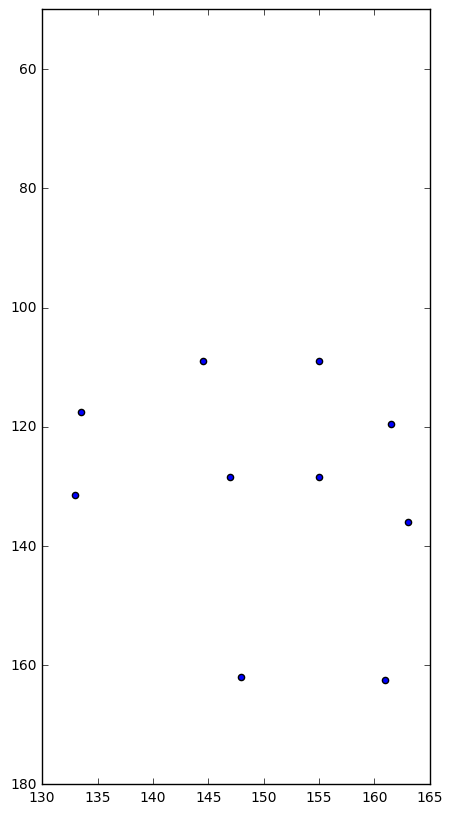

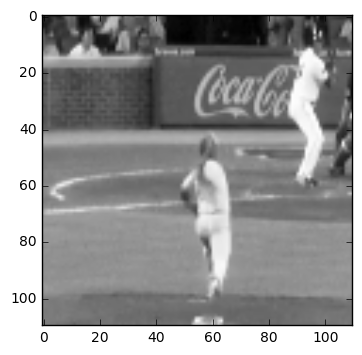

In [120]:
plt.figure(figsize = (5,10))
# for i, j in enumerate(joints_list[:18]):
plt.scatter(joints_array[2, 90, :12, 1], joints_array[2, 90, :12, 0]) #, label=j)
plt.legend(loc="top right")
plt.ylim(180,50)
plt.show()
plt.imshow(videos_p[2,90])
plt.show()